In [1]:
import slab 
from slab import *
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
from scipy import interpolate as interp 
import h5py
from h5py import File
%matplotlib notebook


In [2]:
'''
Need to convert type-J to type K since I messed up...
'''

# data taken from thermocoupleinfo.com reference tables

def Type_K_lookup(V):
    type_K_data=[[-50, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100], 
            [-1.889, 0.000, 2.023, 4.096, 6.138, 8.138, 10.153, 12.209, 14.293,16.397, 18.516,          20.644, 22.776, 24.905, 27.025, 29.129, 31.213, 33.275, 35.313, 37.326, 39.314, 41.276, 43.211, 45.119]]
    f_K=interp.CubicSpline(type_K_data[1], type_K_data[0])
    return f_K(V)

def Type_J_lookup(T):
    type_J_data=[[-50, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100],[-2.431, 0.000, 2.585, 5.269, 8.010, 10.779, 13.555, 16.327, 19.090, 21.848, 24.610, 27.393, 30.216, 33.102, 36.071, 39.132, 42.281, 45.496, 48.715, 51.877, 54.956, 57.953, 60.890, 63.792]]
    f_J=interp.CubicSpline(type_J_data[0], type_J_data[1])
    return f_J(T)

def J_to_K_conv(T):
    return Type_K_lookup(Type_J_lookup(T))

In [4]:
'''
Log file
'''

log_path='c:\\Users\\Molybdenum\\Documents\\Furnace Automation\\Furnace Logs\\'
    
fname='00000_2021-02-16_RGA_log.h5'

<IPython.core.display.Javascript object>


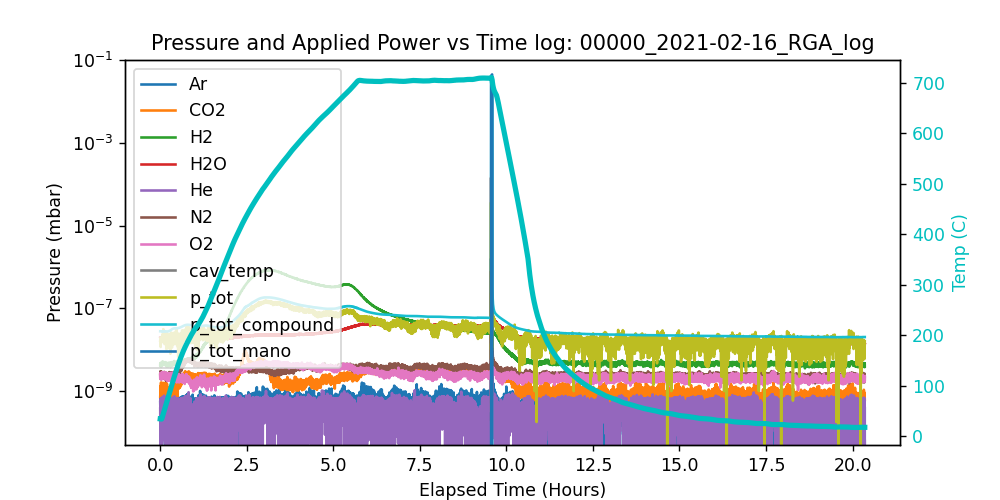

In [22]:
with File(log_path+fname, 'r') as f:
    tpts=np.array(f['tpts']-f['tpts'][0])
    temp=np.array(f['cav_temp'])
    pp_vals={}
#     volts=np.array(f['volts'])
    keys = [key for key in f.keys()]
    for vals in keys:
        if vals!='tpts' and vals!='volts' and vals!='curr' and vals!='fil_state':
            pp_vals[vals]=np.array(f[vals])
            

#convert temps:
# temp=J_to_K_conv(temp)
ax2.plot(tpts/3600, temp, '-r', linewidth=3, label='Measured Coil Power')
fig, ax=plt.subplots(figsize=(8,4))
for key in iter(pp_vals.keys()):
    plt.semilogy(tpts/3600, pp_vals[key], label=key)
ax.set_ylim([5E-11,1E-1])

ax.set_xlabel('Elapsed Time (Hours)')
ax.set_ylabel('Pressure (mbar)')

ax2 = ax.twinx()


plt.title('Pressure and Applied Power vs Time log: %s'%fname.split('.')[0])

ax2.plot(tpts/3600, temp, '-c', linewidth=3, label='Measured Coil Power')

ax2.set_ylabel('Temp (C)', color='c')
ax2.tick_params(axis='y', labelcolor='c')
ax.legend(loc=2)
# plt.xlim([9.4,9.7])
# plt.savefig(fname.split('.')[0]+'.png', bbox_inches='tight',dpi=500)

In [8]:
max(pp_vals['p_tot_mano'])

0.044806

In [27]:
print(tpts[I_val]/3600, volts[I_val])
plt.axvline(tpts[I_val]/3600)
plt.axhline(temp[I_val])
plt.axhline(volts[I_val])

1.8957511927684148 18.469
